Simulating episode 0
Sum of rewards 14.0
Simulating episode 1
Sum of rewards 13.0
Simulating episode 2
Sum of rewards 37.0
Simulating episode 3
Sum of rewards 21.0
Simulating episode 4
Sum of rewards 10.0
Simulating episode 5
Sum of rewards 59.0
Simulating episode 6
Sum of rewards 27.0
Simulating episode 7
Sum of rewards 15.0
Simulating episode 8
Sum of rewards 9.0
Simulating episode 9
Sum of rewards 25.0
Simulating episode 10
Sum of rewards 28.0
Simulating episode 11
Sum of rewards 20.0
Simulating episode 12
Sum of rewards 15.0
Simulating episode 13
Sum of rewards 45.0
Simulating episode 14
Sum of rewards 18.0
Simulating episode 15
Sum of rewards 15.0
Simulating episode 16
Sum of rewards 15.0
Simulating episode 17
Sum of rewards 26.0
Simulating episode 18
Sum of rewards 18.0
Simulating episode 19
Sum of rewards 18.0
Simulating episode 20
Sum of rewards 37.0
Simulating episode 21
Sum of rewards 28.0
Simulating episode 22
Sum of rewards 22.0
Simulating episode 23
Sum of rewards 15.0
Sim

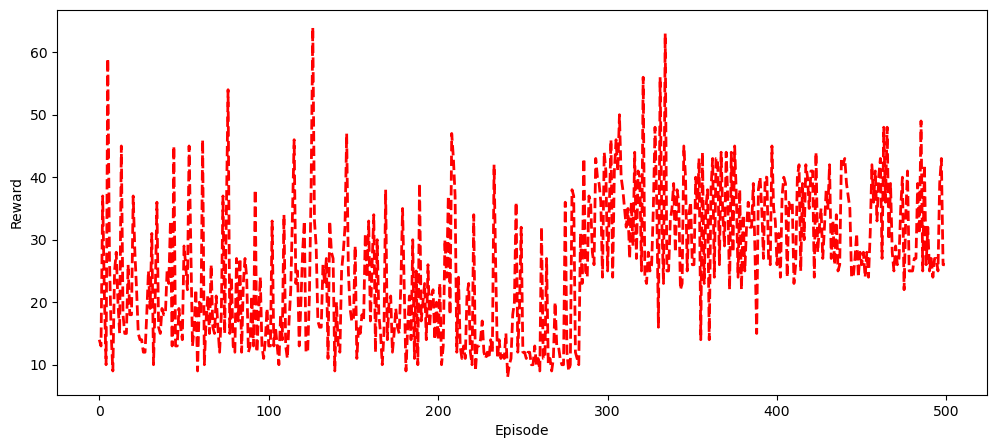

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Mac\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Mac\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Mac\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Mac\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the re

In [57]:
import numpy as np
import gym
import time
import matplotlib.pyplot as plt 
class Q_Learning:
    def __init__(self, env, alpha, gamma, epsilon, numberEpisodes, numberOfBins, lowerBounds, upperBounds):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.actionNumber = env.action_space.n
        self.numberEpisodes = numberEpisodes
        self.numberOfBins = numberOfBins
        self.lowerBounds = lowerBounds
        self.upperBounds = upperBounds
        self.sumRewardsEpisode = []
        self.Qmatrix = np.random.uniform(low=0, high=1, size=(numberOfBins[0], numberOfBins[1], numberOfBins[2], numberOfBins[3], self.actionNumber))
    
    def returnIndexState(self, state):
        position = state[0]
        velocity = state[1]
        angle = state[2]
        angularVelocity = state[3]
        cartPositionBin = np.linspace(self.lowerBounds[0], self.upperBounds[0], self.numberOfBins[0])
        cartVelocityBin = np.linspace(self.lowerBounds[1], self.upperBounds[1], self.numberOfBins[1])
        poleAngleBin = np.linspace(self.lowerBounds[2], self.upperBounds[2], self.numberOfBins[2])
        poleAngleVelocityBin = np.linspace(self.lowerBounds[3], self.upperBounds[3], self.numberOfBins[3])
        indexPosition = np.maximum(np.digitize(state[0], cartPositionBin) - 1, 0)
        indexVelocity = np.maximum(np.digitize(state[1], cartVelocityBin) - 1, 0)
        indexAngle = np.maximum(np.digitize(state[2], poleAngleBin) - 1, 0)
        indexAngularVelocity = np.maximum(np.digitize(state[3], poleAngleVelocityBin) - 1, 0)
        return tuple([indexPosition, indexVelocity, indexAngle, indexAngularVelocity])
    
    def selectAction(self, state, index):
        if index < 200:
            return np.random.choice(self.actionNumber)
        randomNumber = np.random.random()
        if index > 250:
            self.epsilon = 0.999 * self.epsilon
        if randomNumber < self.epsilon:
            return np.random.choice(self.actionNumber)
        else:
            return np.random.choice(np.where(self.Qmatrix[self.returnIndexState(state)] == np.max(self.Qmatrix[self.returnIndexState(state)]))[0])
    
    def simulateEpisodes(self):
        for indexEpisode in range(self.numberEpisodes):
            rewardsEpisode = []
            (stateS, _) = self.env.reset()
            stateS = list(stateS)
            print("Simulating episode {}".format(indexEpisode))
            terminalState = False
            while not terminalState:
                stateSIndex = self.returnIndexState(stateS)
                actionA = self.selectAction(stateS, indexEpisode)
                (stateSprime, reward, terminalState, _, _) = self.env.step(actionA)
                rewardsEpisode.append(reward)
                stateSprime = list(stateSprime)
                stateSprimeIndex = self.returnIndexState(stateSprime)
                QmaxPrime = np.max(self.Qmatrix[stateSprimeIndex])
                if not terminalState:
                    error=reward+self.gamma*QmaxPrime-self.Qmatrix[stateSIndex+(actionA,)]
                    self.Qmatrix[stateSIndex+(actionA,)]=self.Qmatrix[stateSIndex+(actionA,)]+self.alpha*error
                else:
                    error=reward-self.Qmatrix[stateSIndex+(actionA,)]
                    self.Qmatrix[stateSIndex+(actionA,)]=self.Qmatrix[stateSIndex+(actionA,)]+self.alpha*error                  
                stateS=stateSprime
            print("Sum of rewards {}".format(np.sum(rewardsEpisode)))        
            self.sumRewardsEpisode.append(np.sum(rewardsEpisode))
    def simulateLearnedStrategy(self):
        env1 = gym.make('CartPole-v1', render_mode='human')
        currentState = env1.reset()[0]
        obtainedRewards = []
        while True:
            action = np.argmax(self.Qmatrix[self.returnIndexState(currentState)])
            currentState, reward, terminated, _, _ = env1.step(action)
            obtainedRewards.append(reward)
            time.sleep(0.05)
            if terminated:
                time.sleep(1)
                break
        return obtainedRewards, env1
   

    def show_optimal_policy(policy):
        x = range(policy.shape[0])
        y = range(policy.shape[1])
        X, Y = np.meshgrid(x, y)
        Z = policy.sum(axis=2).T
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='coolwarm')
        ax.set_xlabel('Position')
        ax.set_ylabel('Velocity')
        ax.set_zlabel('Action')
        plt.show()
        show_optimal_policy(policy)

env = gym.make('CartPole-v1', render_mode='human')
upperBounds = env.observation_space.high
lowerBounds = env.observation_space.low
cartVelocityMin, cartVelocityMax = float('-inf'), float('inf')
poleAngleVelocityMin, poleAngleVelocityMax = float('-inf'), float('inf')
upperBounds[1], upperBounds[3] = cartVelocityMax, poleAngleVelocityMax
lowerBounds[1], lowerBounds[3] = cartVelocityMin, poleAngleVelocityMin
numberOfBinsPosition = 30
numberOfBinsVelocity = 30
numberOfBinsAngle = 30
numberOfBinsAngleVelocity=30
numberOfBins=[numberOfBinsPosition,numberOfBinsVelocity,numberOfBinsAngle,numberOfBinsAngleVelocity]
alpha=0.1
gamma=0.9
epsilon=0.05
numberEpisodes=500
 

Q1=Q_Learning(env,alpha,gamma,epsilon,numberEpisodes,numberOfBins,lowerBounds,upperBounds)
Q1.simulateEpisodes()
plt.figure(figsize=(12, 5))
plt.plot(Q1.sumRewardsEpisode, color='red', linewidth=2, linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.yscale('linear')
plt.show()
env1.close()
np.sum(obtainedRewardsOptimal)
(obtainedRewardsOptimal,env1)=Q1.simulateLearnedStrategy()

